In [1]:
!pip install ffn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
import pandas as pd
import requests
import ffn
import time
import warnings
import seaborn as sns
%matplotlib inline

## Fund Data Collection

In [3]:
meta_master = requests.get('https://fundcentres.lgim.com/srp/api/fund-centre/2/?audience=79&language=1').json()['metadata']

fund_fields = [x['code_name'] for x in meta_master['fund_fields']]

share_fields =  [x['code_name'] for x in meta_master['share_class_fields']]

fund_fields_clean = [x['label'] for x in meta_master['fund_fields']]

share_fields_clean =  [x['label'] for x in meta_master['share_class_fields']]

In [4]:
i = 0 
for k in fund_fields:
  print(k, ' -> ', fund_fields_clean[i])
  i += 1

name  ->  Fund name
fundPageURL  ->  Fund page link
benchmark  ->  Benchmark
assetClass  ->  Asset class
style  ->  Style
subGrouping  ->  Sub-grouping
capabilityStyle  ->  Capability / Style
withholdingTaxNote  ->  Withholding Tax Note
globalIBORReformsMessage  ->  Global IBOR Reforms Message
ukPropertyMessage  ->  UK Property message
secureIncomeAssetsMessage  ->  Secure Income Assets Message


In [5]:
i = 0 
for k in share_fields:
  print(k, ' -> ', share_fields_clean[i])
  i += 1

iterationPageURL  ->  Iteration page link
availableUK  ->  UK
iterationNetWHT  ->  Net WHT
iterationWithCharges  ->  With charges
iterationHedgedGBP  ->  Currency hedged GBP
iterationHedgedEUR  ->  Currency hedged EUR
olabCurrencyGBP  ->  OLAB Currency GBP
olabCurrencyEUR  ->  OLAB Currency EUR
iterationName  ->  Iteration type
scopeCode  ->  Fund code
shareclassBenchmark  ->  Benchmark
currency  ->  Currency
dailyMidday  ->  Daily Midday
dailyClose  ->  Daily Close
weeklyClose  ->  Weekly Close
launchDate  ->  Launch date
iterationSearchName  ->  Iteration type
availableDB  ->  DB
availableDC  ->  DC
availableOLAB  ->  OLAB
priceCurrency  ->  Currency
performanceBasis  ->  Perf. basis
cum1m  ->  1 month
cum3m  ->  3 months
cum6m  ->  6 months
cum1y  ->  1 year
cum3y  ->  3 years
cum5y  ->  5 years
ann5y  ->  5 years
ann3y  ->  3 years
annly  ->  Launch
cum1mEur  ->  1 month
cum3mEur  ->  3 months
cum6mEur  ->  6 months
cum1yEur  ->  1 year
cum3yEur  ->  3 years
cum5yEur  ->  5 years
a

In [7]:
fund_data = requests.get('https://fundcentres.lgim.com/srp/api/fund-centre/2/?audience=79&language=1').json()['funds']

In [8]:
for f in fund_data:
  new_info = {}
  i = 0
  for x in f['data']:
    new_info[fund_fields[i]] = x
    i+=1
  f['data'] = new_info
  
  new_sc = []
  for s_c in f['share_classes']:
    new_s_c_info={}
    k = 0
    for x in s_c['data']:
      new_s_c_info[share_fields[k]] = x
      new_s_c_info['fund_data'] = new_info
      k+=1
      s_c['data'] = new_s_c_info

In [9]:
sc_df = pd.json_normalize(fund_data, record_path = 'share_classes')
sc_df

,id,currency,data.iterationPageURL,data.fund_data.name,data.fund_data.fundPageURL,data.fund_data.benchmark,data.fund_data.assetClass,data.fund_data.style,data.fund_data.subGrouping,data.fund_data.capabilityStyle,...,data.priceDailyCloseDealingEur,data.priceDailyCloseDealingEur__date,data.priceWeeklyBid,data.priceWeeklyBid__date,data.priceWeeklyMid,data.priceWeeklyMid__date,data.priceWeeklyOffer,data.priceWeeklyOffer__date,data.priceDailyMiddayMid,data.priceDailyMiddayMid__date
0,2806,GBP,/uk/en/fund-centre/PMC/0-to-5-Year-Gilts-Index...,0 to 5 Year Gilts Index Fund,/uk/en/fund-centre/PMC/0-to-5-Year-Gilts-Index...,FTSE Actuaries UK Conventional Gilts up to 5 Y...,Fixed income,Index,UK gilt,Index fixed income,...,215.840781,2022-10-20,185.893000,2022-10-17,185.894000,2022-10-17,185.894000,2022-10-17,None,None
1,2808,GBP,/uk/en/fund-centre/PMC/5-to-15-Year-Gilts-Inde...,5 to 15 Year Gilts Index Fund,/uk/en/fund-centre/PMC/5-to-15-Year-Gilts-Inde...,FTSE Actuaries UK Conventional Gilts 5-15 Year...,Fixed income,Index,UK gilt,Index fixed income,...,265.756010,2022-10-20,222.866000,2022-10-17,222.866000,2022-10-17,222.866000,2022-10-17,228.413000,2022-10-21
2,2809,GBP,/uk/en/fund-centre/PMC/5-to-15-Year-Index-Link...,5 to 15 Year Index-Linked Gilts Index Fund,/uk/en/fund-centre/PMC/5-to-15-Year-Index-Link...,FTSE Actuaries UK Index-Linked Gilts 5-15 Year...,Fixed income,Index,UK index-linked gilt,Index fixed income,...,133.146002,2022-10-20,107.117000,2022-10-17,107.117000,2022-10-17,107.117000,2022-10-17,114.953000,2022-10-21
3,2810,GBP,/uk/en/fund-centre/PMC/5-to-15-Year-Index-Link...,5 to 15 Year Index-Linked Gilts Index Fund,/uk/en/fund-centre/PMC/5-to-15-Year-Index-Link...,FTSE Actuaries UK Index-Linked Gilts 5-15 Year...,Fixed income,Index,UK index-linked gilt,Index fixed income,...,None,None,None,None,None,None,None,None,None,None
4,2811,GBP,/uk/en/fund-centre/PMC/AAA-AA-Fixed-Interest-A...,AAA-AA Fixed Interest All Stocks Targeted Dura...,/uk/en/fund-centre/PMC/AAA-AA-Fixed-Interest-A...,None,Fixed income,Index,UK corporate bonds,Index fixed income,...,251.270392,2022-10-20,205.691000,2022-10-17,206.167000,2022-10-17,206.643000,2022-10-17,216.112000,2022-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,6665,GBP,,Annuity Target Date Funds,,None,Multi-asset,None,Target date,Multi-asset,...,115.020000,2022-10-20,None,None,None,None,None,None,None,None
483,6667,EUR,,Single Stock Green Gilt Funds,,None,Fixed income,Index,UK gilt,Index fixed income,...,66.567595,2022-10-20,55.381477,2022-10-17,55.381477,2022-10-17,55.381477,2022-10-17,None,None
484,6670,GBP,/uk/en/fund-centre/PMC/FTSE-Climate-Transition...,FTSE Climate Transition UK Equity Index Fund,/uk/en/fund-centre/PMC/FTSE-Climate-Transition...,FTSE All-Share CTB Ex Investment Trust,Equity,Index,UK equity,Index equity,...,None,None,87.493100,2022-10-17,87.543800,2022-10-17,88.032100,2022-10-17,None,None
485,6725,GBP,/uk/en/fund-centre/PMC/FTSE-Climate-Transition...,FTSE Climate Transition World Developed Equity...,/uk/en/fund-centre/PMC/FTSE-Climate-Transition...,FTSE Developed Climate Transition (CTB) Index,Equity,Index,Global equity,Index equity,...,None,None,95.272400,2022-10-17,95.310600,2022-10-17,95.374800,2022-10-17,None,None


In [10]:
# example of a row in "clean" dataframe for all share classes
sc_df.iloc[12].to_dict()

{'id': 2819,
 'currency': 'GBP',
 'data.iterationPageURL': '/uk/en/fund-centre/PMC/Absolute-Return-Bond-Fund/?scope_code=YAAF',
 'data.fund_data.name': 'Absolute Return Bond Fund',
 'data.fund_data.fundPageURL': '/uk/en/fund-centre/PMC/Absolute-Return-Bond-Fund/',
 'data.fund_data.benchmark': 'ICE BofA SONIA 3-Month Constant Maturity Total Return Index',
 'data.fund_data.assetClass': 'Fixed income',
 'data.fund_data.style': 'Active',
 'data.fund_data.subGrouping': 'Global corporate bonds',
 'data.fund_data.capabilityStyle': 'Active fixed income',
 'data.fund_data.withholdingTaxNote': '',
 'data.fund_data.globalIBORReformsMessage': '<p>LIBOR is changing:&nbsp;<a href="/uk/en/Global-IBOR-reforms/" class="" target="" title="" data-mce-href="/uk/en/Global-IBOR-reforms/">read more</a>&nbsp;on how future reforms of interbank offered rates may affect your investments with us.</p>',
 'data.fund_data.ukPropertyMessage': '',
 'data.fund_data.secureIncomeAssetsMessage': '',
 'data.availableUK': T

In [12]:
fi = sc_df[sc_df['data.fund_data.assetClass'] == 'Fixed income']
fi.head(5)

,id,currency,data.iterationPageURL,data.fund_data.name,data.fund_data.fundPageURL,data.fund_data.benchmark,data.fund_data.assetClass,data.fund_data.style,data.fund_data.subGrouping,data.fund_data.capabilityStyle,...,data.priceDailyCloseDealingEur,data.priceDailyCloseDealingEur__date,data.priceWeeklyBid,data.priceWeeklyBid__date,data.priceWeeklyMid,data.priceWeeklyMid__date,data.priceWeeklyOffer,data.priceWeeklyOffer__date,data.priceDailyMiddayMid,data.priceDailyMiddayMid__date
0,2806,GBP,/uk/en/fund-centre/PMC/0-to-5-Year-Gilts-Index...,0 to 5 Year Gilts Index Fund,/uk/en/fund-centre/PMC/0-to-5-Year-Gilts-Index...,FTSE Actuaries UK Conventional Gilts up to 5 Y...,Fixed income,Index,UK gilt,Index fixed income,...,215.840781,2022-10-20,185.893000,2022-10-17,185.894000,2022-10-17,185.894000,2022-10-17,None,None
1,2808,GBP,/uk/en/fund-centre/PMC/5-to-15-Year-Gilts-Inde...,5 to 15 Year Gilts Index Fund,/uk/en/fund-centre/PMC/5-to-15-Year-Gilts-Inde...,FTSE Actuaries UK Conventional Gilts 5-15 Year...,Fixed income,Index,UK gilt,Index fixed income,...,265.756010,2022-10-20,222.866000,2022-10-17,222.866000,2022-10-17,222.866000,2022-10-17,228.413000,2022-10-21
2,2809,GBP,/uk/en/fund-centre/PMC/5-to-15-Year-Index-Link...,5 to 15 Year Index-Linked Gilts Index Fund,/uk/en/fund-centre/PMC/5-to-15-Year-Index-Link...,FTSE Actuaries UK Index-Linked Gilts 5-15 Year...,Fixed income,Index,UK index-linked gilt,Index fixed income,...,133.146002,2022-10-20,107.117000,2022-10-17,107.117000,2022-10-17,107.117000,2022-10-17,114.953000,2022-10-21
3,2810,GBP,/uk/en/fund-centre/PMC/5-to-15-Year-Index-Link...,5 to 15 Year Index-Linked Gilts Index Fund,/uk/en/fund-centre/PMC/5-to-15-Year-Index-Link...,FTSE Actuaries UK Index-Linked Gilts 5-15 Year...,Fixed income,Index,UK index-linked gilt,Index fixed income,...,None,None,None,None,None,None,None,None,None,None
4,2811,GBP,/uk/en/fund-centre/PMC/AAA-AA-Fixed-Interest-A...,AAA-AA Fixed Interest All Stocks Targeted Dura...,/uk/en/fund-centre/PMC/AAA-AA-Fixed-Interest-A...,None,Fixed income,Index,UK corporate bonds,Index fixed income,...,251.270392,2022-10-20,205.691000,2022-10-17,206.167000,2022-10-17,206.643000,2022-10-17,216.112000,2022-10-21


In [13]:
fi.groupby('data.fund_data.style').count()['id']

data.fund_data.style
Active    29
Index     98
Name: id, dtype: int64

In [14]:
fi['launch_year'] = fi['data.launchDate'].apply(lambda x: int(x[:4]) if x else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
fi.groupby('launch_year').count()['id']

launch_year
0       11
1971     1
1983     1
1992     2
1994     1
1995     1
1996     2
1997     1
1999     4
2000     4
2001     2
2002     3
2003     5
2004     4
2005     3
2006     3
2007     4
2008    15
2009     2
2010     5
2011     4
2012     6
2013     5
2014     3
2015     5
2016     3
2017     3
2018     5
2019    10
2020     3
2021     2
2022     4
Name: id, dtype: int64

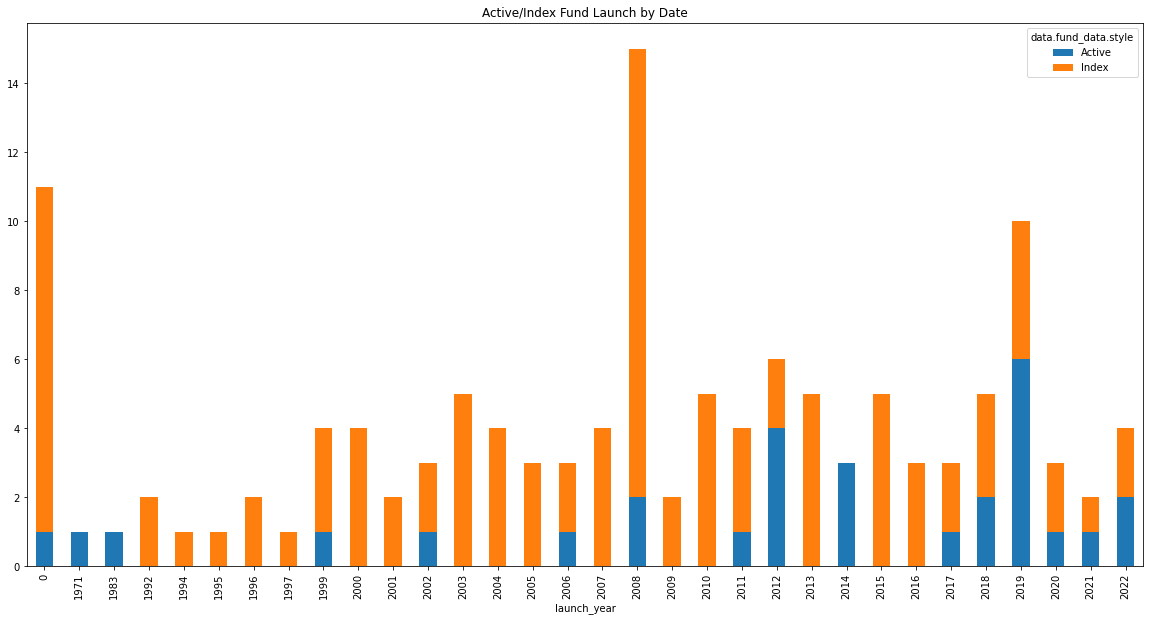

In [79]:
fi.groupby(['launch_year', 'data.fund_data.style']).count()['id'].unstack().plot(kind='bar', stacked=True, figsize=(20, 10), 
                                                                title='Active/Index Fund Launch by Date')

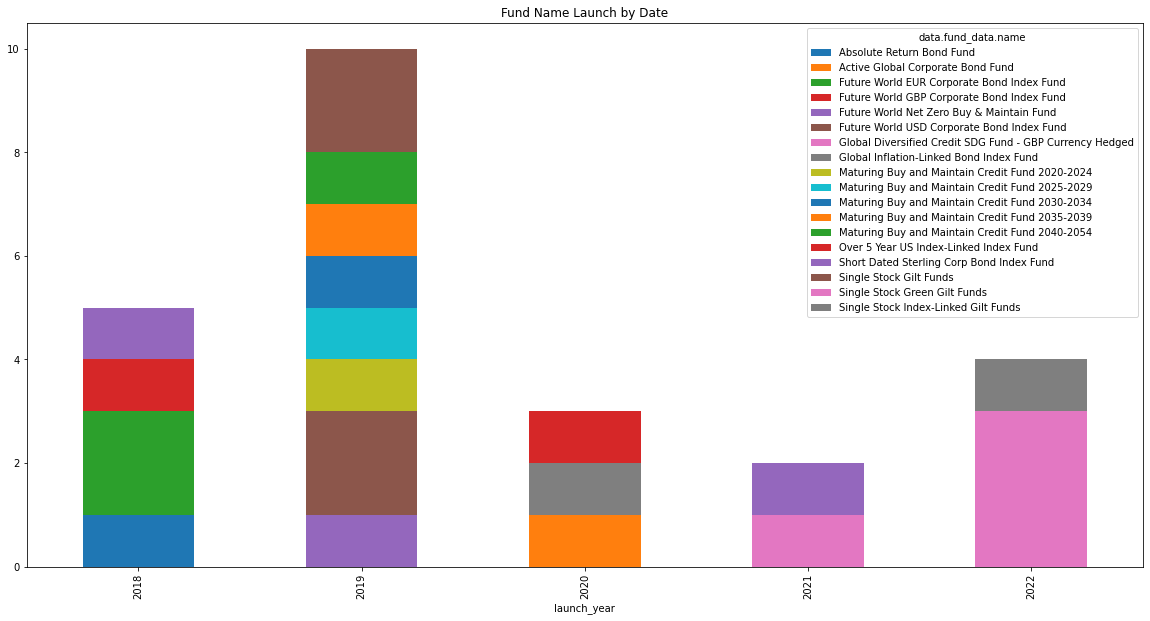

In [20]:
fi[fi['launch_year'] > 2017].groupby(['launch_year', 'data.fund_data.name']).count()['id'].unstack().plot(kind='bar', stacked=True, figsize=(20, 10), 
                                                                title='Fund Name Launch by Date')

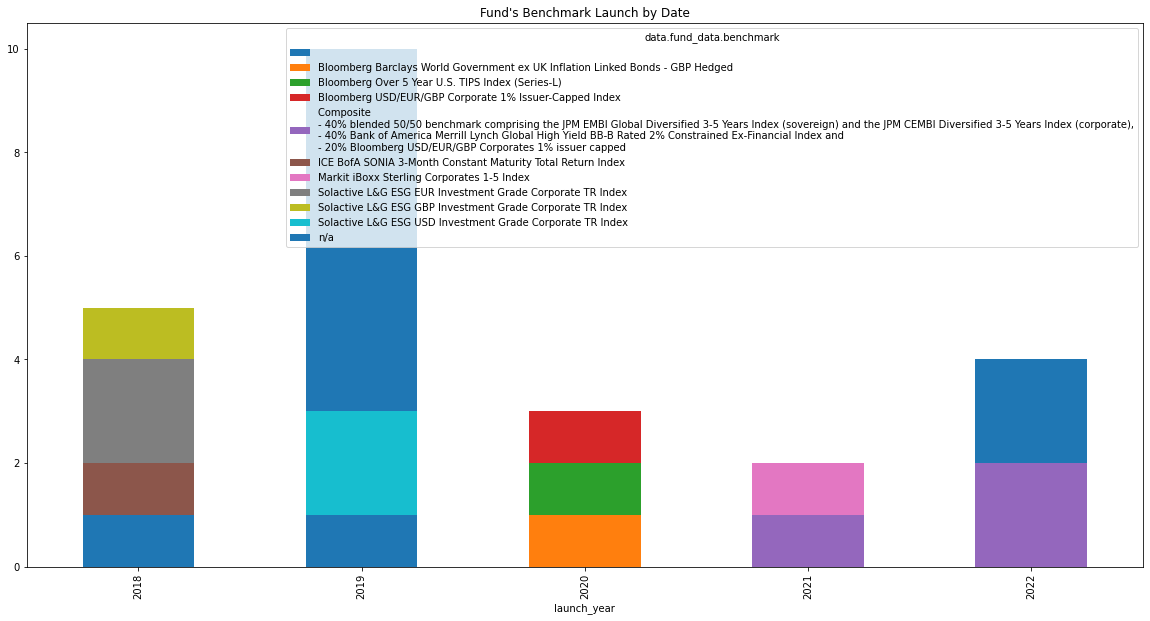

In [21]:
fi[fi['launch_year'] > 2017].fillna('n/a').groupby(['launch_year', 'data.fund_data.benchmark']).count()['id'].unstack().plot(kind='bar', stacked=True, figsize=(20, 10),
                                                                          title='Fund\'s Benchmark Launch by Date')

## Performance Analysis

In [ ]:
# unable to find an api end point to download historic prices data for analysis, especially one go
# maybe possible here https://fundcentres.lgim.com/srp/api/part?id=3137&route=1346&audience=79&price_part_day=12&price_part_month=10&price_part_year=2022
# but unable to look up "route id" dynamically in a simple solution!

In [ ]:
# only this end point available: https://fundcentres.lgim.com/srp/api/perf-chart-part-new?shareclass=2819&part_id=3124&max_period_length=40 

In [27]:
# lets use share classes older than 5 years old!
share_class_list = fi[fi['launch_year'] < 2017]['id'].unique()
len(share_class_list)

100

In [109]:
list_price_dfs = []

for s_i in share_class_list:
  s_i = str(s_i)
  print('Fetching data for :', s_i)
  sp = requests.get(f'https://fundcentres.lgim.com/srp/api/perf-chart-part-new?shareclass={s_i}&part_id=3124&max_period_length=40').json().get('share_class_plots', None)

  if sp == None or sp[0]['price_type'] != 'WeeklyCloseGross':
    warnings.warn("No prices detected! Share Class: " + s_i)
    print('Sleeping....')
    print()
    continue

  df_p = pd.DataFrame(sp[0]['data'], columns=['time', s_i])
  df_p = df_p.set_index(pd.to_datetime(df_p['time'], unit='ms'))

  df_p[s_i + '_p'] = df_p[s_i] + 100
  list_price_dfs.append(df_p[s_i + '_p'])
  print('Sleeping....')
  time.sleep(1)


Fetching data for : 2806
Sleeping....
Fetching data for : 2808
Sleeping....
Fetching data for : 2809
Sleeping....
Fetching data for : 2810


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: No prices detected! Share Class: 2810
  if __name__ == '__main__':


Sleeping....

Fetching data for : 2811
Sleeping....
Fetching data for : 2812
Sleeping....
Fetching data for : 2813
Sleeping....
Fetching data for : 2814
Sleeping....
Fetching data for : 2815
Sleeping....
Fetching data for : 2816
Sleeping....
Fetching data for : 2817
Sleeping....
Fetching data for : 2818
Sleeping....
Fetching data for : 2819
Sleeping....
Fetching data for : 2826
Sleeping....
Fetching data for : 2827
Sleeping....
Fetching data for : 2828
Sleeping....
Fetching data for : 2829
Sleeping....
Fetching data for : 2830
Sleeping....
Fetching data for : 2831
Sleeping....
Fetching data for : 5940
Sleeping....
Fetching data for : 2833
Sleeping....
Fetching data for : 2834
Sleeping....
Fetching data for : 2835
Sleeping....
Fetching data for : 2836
Sleeping....
Fetching data for : 2837
Sleeping....
Fetching data for : 2851
Sleeping....
Fetching data for : 2852
Sleeping....
Fetching data for : 2856
Sleeping....
Fetching data for : 2857
Sleeping....
Fetching data for : 2866
Sleeping...

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: No prices detected! Share Class: 2939
  if __name__ == '__main__':


Sleeping....

Fetching data for : 2940
Sleeping....
Fetching data for : 2941
Sleeping....
Fetching data for : 2981
Sleeping....
Fetching data for : 2984
Sleeping....
Fetching data for : 2989
Sleeping....
Fetching data for : 2990
Sleeping....
Fetching data for : 2991
Sleeping....
Fetching data for : 2992
Sleeping....
Fetching data for : 3029
Sleeping....
Fetching data for : 3030
Sleeping....
Fetching data for : 3031
Sleeping....
Fetching data for : 3032
Sleeping....
Fetching data for : 3033
Sleeping....
Fetching data for : 3034
Sleeping....
Fetching data for : 3035
Sleeping....
Fetching data for : 3037
Sleeping....
Fetching data for : 3038
Sleeping....
Fetching data for : 3039
Sleeping....
Fetching data for : 3053
Sleeping....
Fetching data for : 3065
Sleeping....
Fetching data for : 3075
Sleeping....
Fetching data for : 3076
Sleeping....
Fetching data for : 3078
Sleeping....
Fetching data for : 3079


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: No prices detected! Share Class: 3079
  if __name__ == '__main__':


Sleeping....

Fetching data for : 3083
Sleeping....
Fetching data for : 3085
Sleeping....
Fetching data for : 3086
Sleeping....
Fetching data for : 3087
Sleeping....
Fetching data for : 3088
Sleeping....
Fetching data for : 3245
Sleeping....
Fetching data for : 3246
Sleeping....
Fetching data for : 3247
Sleeping....
Fetching data for : 3248
Sleeping....
Fetching data for : 3249
Sleeping....
Fetching data for : 3250
Sleeping....
Fetching data for : 3251
Sleeping....
Fetching data for : 3253
Sleeping....
Fetching data for : 3254
Sleeping....
Fetching data for : 3255
Sleeping....
Fetching data for : 3256
Sleeping....
Fetching data for : 3258
Sleeping....
Fetching data for : 3259
Sleeping....
Fetching data for : 3260
Sleeping....
Fetching data for : 3261
Sleeping....
Fetching data for : 3262
Sleeping....
Fetching data for : 3263
Sleeping....
Fetching data for : 3264
Sleeping....
Fetching data for : 3265
Sleeping....
Fetching data for : 3266
Sleeping....
Fetching data for : 3267
Sleeping...

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: No prices detected! Share Class: 5422
  if __name__ == '__main__':


Sleeping....

Fetching data for : 5423


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: No prices detected! Share Class: 5423
  if __name__ == '__main__':


Sleeping....

Fetching data for : 5420


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: No prices detected! Share Class: 5420
  if __name__ == '__main__':


Sleeping....

Fetching data for : 5421


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: No prices detected! Share Class: 5421
  if __name__ == '__main__':


Sleeping....

Fetching data for : 5419


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: No prices detected! Share Class: 5419
  if __name__ == '__main__':


Sleeping....

Fetching data for : 5796
Sleeping....
Fetching data for : 5797
Sleeping....


In [110]:
master_prices_df = pd.concat(list_price_dfs, axis=1).dropna(axis=1)
master_prices_df

,2806_p,2808_p,2809_p,2811_p,2813_p,2815_p,2817_p,2819_p,2826_p,2828_p,...,3262_p,3263_p,3264_p,3265_p,3266_p,3267_p,3268_p,3269_p,3270_p,3271_p
time,,,,,,,,,,,,,,,,,,,,,
2017-06-30,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
2017-07-31,100.2200,100.4800,99.9300,100.4500,100.4600,100.5800,100.6900,100.3000,100.6600,100.6700,...,99.7500,99.2200,98.8700,98.6500,98.4000,97.9400,97.6800,96.9800,96.8700,96.2300
2017-08-31,100.5407,102.0575,101.9986,102.4389,103.4939,101.9982,103.1670,100.1395,102.0088,102.8143,...,103.0817,103.1888,103.2598,103.5233,103.9498,104.1886,104.4102,105.0778,105.5786,106.3726
2017-09-29,99.6761,99.5367,99.8464,99.8370,99.8302,99.9378,99.8759,100.4099,100.1625,100.0074,...,99.8243,99.3192,99.1191,99.0925,98.9810,98.7187,98.6885,98.3423,98.6421,98.2245
2017-10-31,99.7060,99.7457,100.3057,100.2962,100.5290,100.3376,100.3554,100.4601,100.7034,100.6975,...,100.6528,100.0939,99.7832,99.7763,99.8322,99.6664,100.1885,99.9257,100.3091,100.4738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,100.5541,104.2645,117.1450,108.4886,111.2107,107.1935,110.0281,110.0739,112.2353,115.7821,...,122.0515,124.0025,123.7589,124.7045,125.9440,126.4556,125.9501,126.9612,126.4621,131.9808
2022-03-31,99.8703,102.5233,115.1886,105.8197,107.5852,105.7464,107.9926,110.0629,111.1578,114.6242,...,120.1230,121.3488,120.9001,121.5246,122.1908,122.3205,121.5544,121.8319,120.4172,123.7716
2022-04-29,99.4209,100.4216,112.9425,102.6452,102.5287,103.2190,101.7290,109.5126,108.0899,108.7555,...,116.0989,116.3007,114.5770,114.0508,112.1834,110.8713,108.6454,106.7613,104.4981,104.9212


In [111]:
perf = ffn.core.calc_stats(master_prices_df)
perf.display()

/usr/local/lib/python3.7/dist-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


Stat                 2806_p      2808_p      2809_p      2811_p      2813_p      2815_p      2817_p      2819_p      2826_p      2828_p      2830_p      2831_p      2833_p      2834_p      2836_p      2851_p      2852_p      2856_p      2857_p      2866_p      2868_p      2869_p      2878_p      2879_p      2880_p      2881_p      2908_p      2935_p      2940_p      2941_p      2981_p      2984_p      2989_p      2991_p      3029_p      3031_p      3033_p      3035_p      3037_p      3038_p      3065_p      3075_p      3076_p      3078_p      3083_p      3085_p      3086_p      3087_p      3088_p      3246_p      3247_p      3248_p      3249_p      3250_p      3251_p      3253_p      3254_p      3255_p      3256_p      3258_p      3259_p      3260_p      3261_p      3262_p      3263_p      3264_p      3265_p      3266_p      3267_p      3268_p      3269_p      3270_p      3271_p
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ---

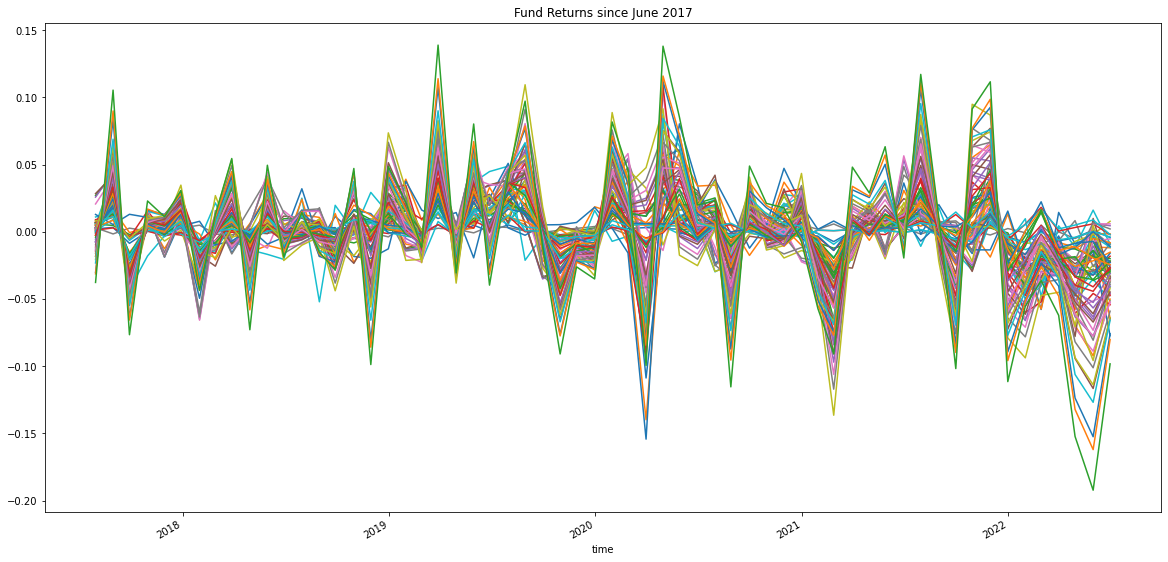

In [121]:
perf.prices.pct_change(1).plot(figsize=(20, 10), title='Fund Returns since June 2017', legend=False)

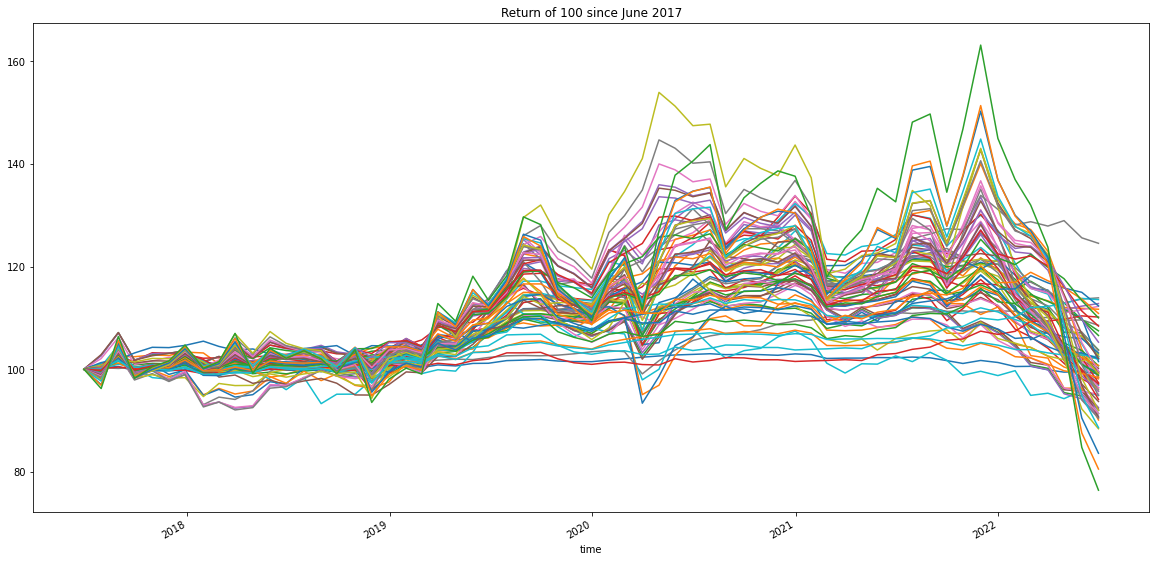

In [122]:
ax = perf.prices.rebase().plot(figsize=(20, 10), title='Return of 100 since June 2017', legend=False)

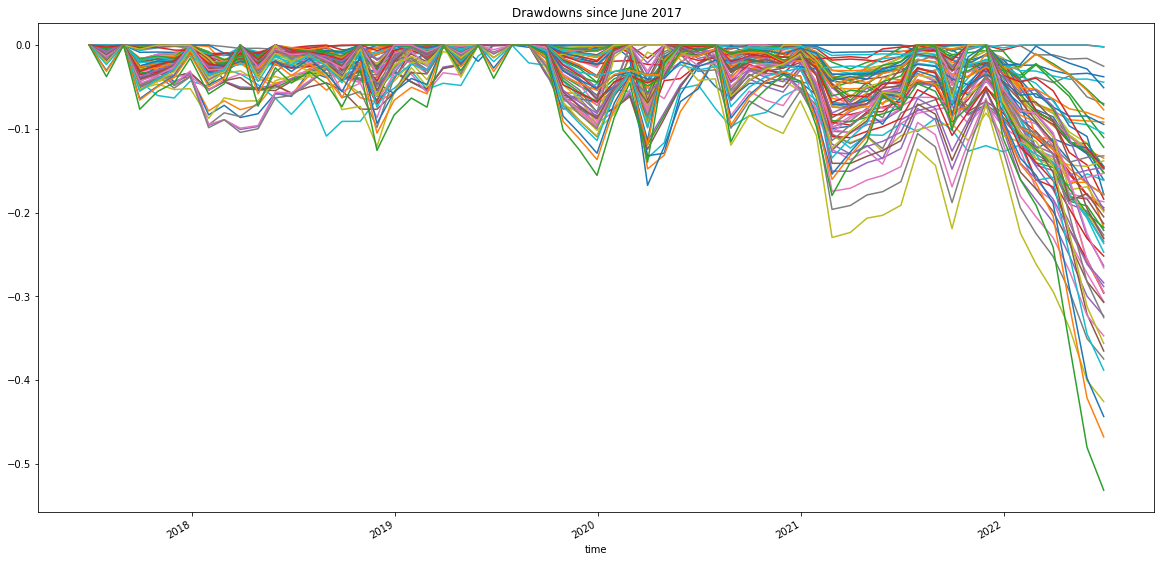

In [124]:
ax = perf.prices.to_drawdown_series().plot(figsize=(20, 10), title='Drawdowns since June 2017', legend=False)

In [115]:
perf_df = perf.stats.transpose()
perf_df['id'] = perf_df.index.map(lambda x: int(x[:4]))
perf_df.head(5)

,start,end,rf,total_return,cagr,max_drawdown,calmar,mtd,three_month,six_month,...,yearly_kurt,best_year,worst_year,avg_drawdown,avg_drawdown_days,avg_up_month,avg_down_month,win_year_perc,twelve_month_win_perc,id
2806_p,2017-06-30,2022-06-30,0.0,-0.008878,-0.001782,-0.037829,-0.047112,-0.0043,-0.01434,-0.025451,...,-2.732374,0.014886,-0.021636,-0.014002,342.0,0.002038,-0.002996,0.6,0.58,2806
2808_p,2017-06-30,2022-06-30,0.0,-0.018848,-0.003799,-0.135108,-0.028117,-0.0119,-0.058978,-0.099706,...,-1.711503,0.056335,-0.088956,-0.041659,261.8,0.009338,-0.011172,0.6,0.64,2808
2809_p,2017-06-30,2022-06-30,0.0,0.065635,0.012797,-0.110449,0.115864,-0.028,-0.090328,-0.110449,...,4.567551,0.04594,-0.083409,-0.031669,199.428571,0.013036,-0.011476,0.8,0.8,2809
2811_p,2017-06-30,2022-06-30,0.0,-0.029051,-0.00588,-0.1973,-0.029801,-0.0226,-0.105022,-0.173462,...,-0.692697,0.096176,-0.152269,-0.03863,146.111111,0.015426,-0.017086,0.6,0.64,2811
2813_p,2017-06-30,2022-06-30,0.0,-0.074763,-0.015423,-0.288468,-0.053465,-0.0366,-0.168032,-0.272434,...,0.003212,0.133276,-0.240299,-0.05479,128.3,0.023037,-0.028018,0.4,0.64,2813


In [116]:
perf_df.iloc[0].to_dict()

{'start': Timestamp('2017-06-30 00:00:00'),
 'end': Timestamp('2022-06-30 00:00:00'),
 'rf': 0.0,
 'total_return': -0.008877999999999941,
 'cagr': -0.0017821830591377985,
 'max_drawdown': -0.037828770135395984,
 'calmar': -0.04711184246167782,
 'mtd': -0.004299770344041831,
 'three_month': -0.014339544583463093,
 'six_month': -0.025451177279189996,
 'ytd': -0.021635868277659287,
 'one_year': -0.030551950052672305,
 'three_year': -0.008702742901559257,
 'five_year': -0.0017821830591377985,
 'ten_year': nan,
 'incep': -0.0017821830591377985,
 'daily_sharpe': nan,
 'daily_sortino': nan,
 'daily_mean': nan,
 'daily_vol': nan,
 'daily_skew': nan,
 'daily_kurt': nan,
 'best_day': nan,
 'worst_day': nan,
 'monthly_sharpe': -0.1515671170950014,
 'monthly_sortino': -0.21730139703491222,
 'monthly_mean': -0.001719977733589828,
 'monthly_vol': 0.0113479609994281,
 'monthly_skew': -0.7003079825877125,
 'monthly_kurt': 0.3046376986334951,
 'best_month': 0.005800377988826488,
 'worst_month': -0.0085

In [117]:
sc_stats = pd.merge(perf_df, fi, how="left", on=["id", "id"])
sc_stats.head(5)

,start,end,rf,total_return,cagr,max_drawdown,calmar,mtd,three_month,six_month,...,data.priceDailyCloseDealingEur__date,data.priceWeeklyBid,data.priceWeeklyBid__date,data.priceWeeklyMid,data.priceWeeklyMid__date,data.priceWeeklyOffer,data.priceWeeklyOffer__date,data.priceDailyMiddayMid,data.priceDailyMiddayMid__date,launch_year
0,2017-06-30,2022-06-30,0.0,-0.008878,-0.001782,-0.037829,-0.047112,-0.0043,-0.01434,-0.025451,...,2022-10-20,185.893000,2022-10-17,185.894000,2022-10-17,185.894000,2022-10-17,None,None,2000
1,2017-06-30,2022-06-30,0.0,-0.018848,-0.003799,-0.135108,-0.028117,-0.0119,-0.058978,-0.099706,...,2022-10-20,222.866000,2022-10-17,222.866000,2022-10-17,222.866000,2022-10-17,228.413000,2022-10-21,1999
2,2017-06-30,2022-06-30,0.0,0.065635,0.012797,-0.110449,0.115864,-0.028,-0.090328,-0.110449,...,2022-10-20,107.117000,2022-10-17,107.117000,2022-10-17,107.117000,2022-10-17,114.953000,2022-10-21,2013
3,2017-06-30,2022-06-30,0.0,-0.029051,-0.00588,-0.1973,-0.029801,-0.0226,-0.105022,-0.173462,...,2022-10-20,205.691000,2022-10-17,206.167000,2022-10-17,206.643000,2022-10-17,216.112000,2022-10-21,2000
4,2017-06-30,2022-06-30,0.0,-0.074763,-0.015423,-0.288468,-0.053465,-0.0366,-0.168032,-0.272434,...,2022-10-20,207.603000,2022-10-17,208.569000,2022-10-17,209.535000,2022-10-17,232.464000,2022-10-21,1999


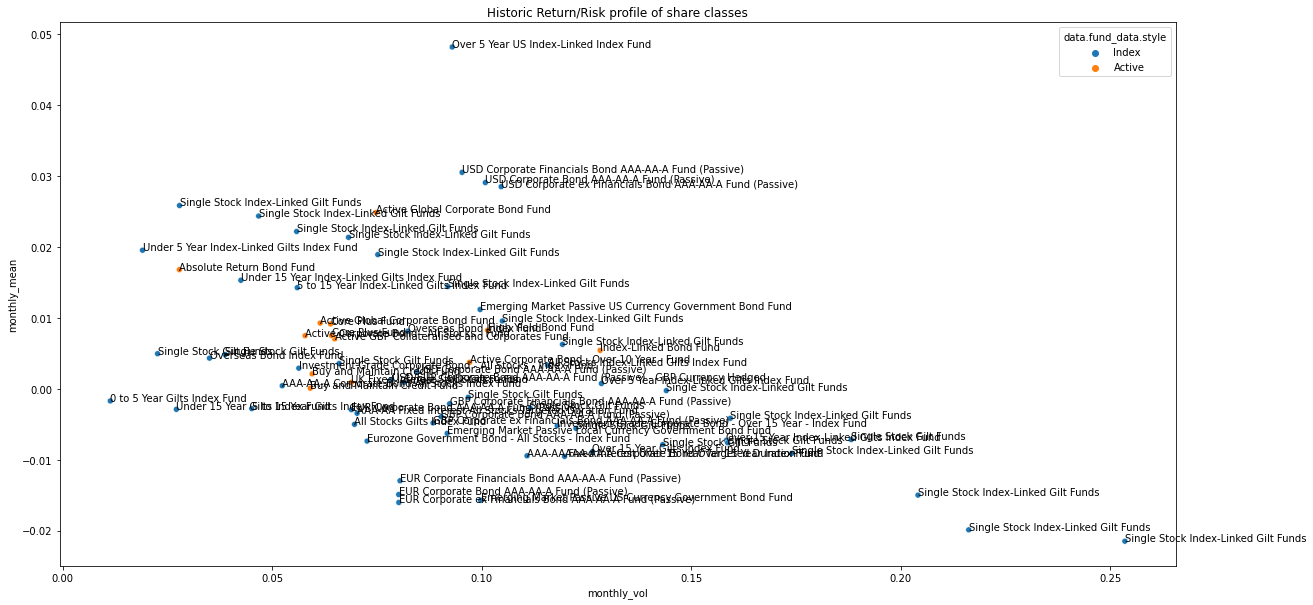

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.scatterplot(x="monthly_vol", y="monthly_mean", data=sc_stats, hue='data.fund_data.style'). \
      set(title='Historic Return/Risk profile of share classes')

# Loop through the data points 
for i, id_v in enumerate(sc_stats['data.fund_data.name']):
    plt.text(sc_stats['monthly_vol'][i], sc_stats['monthly_mean'][i], id_v)

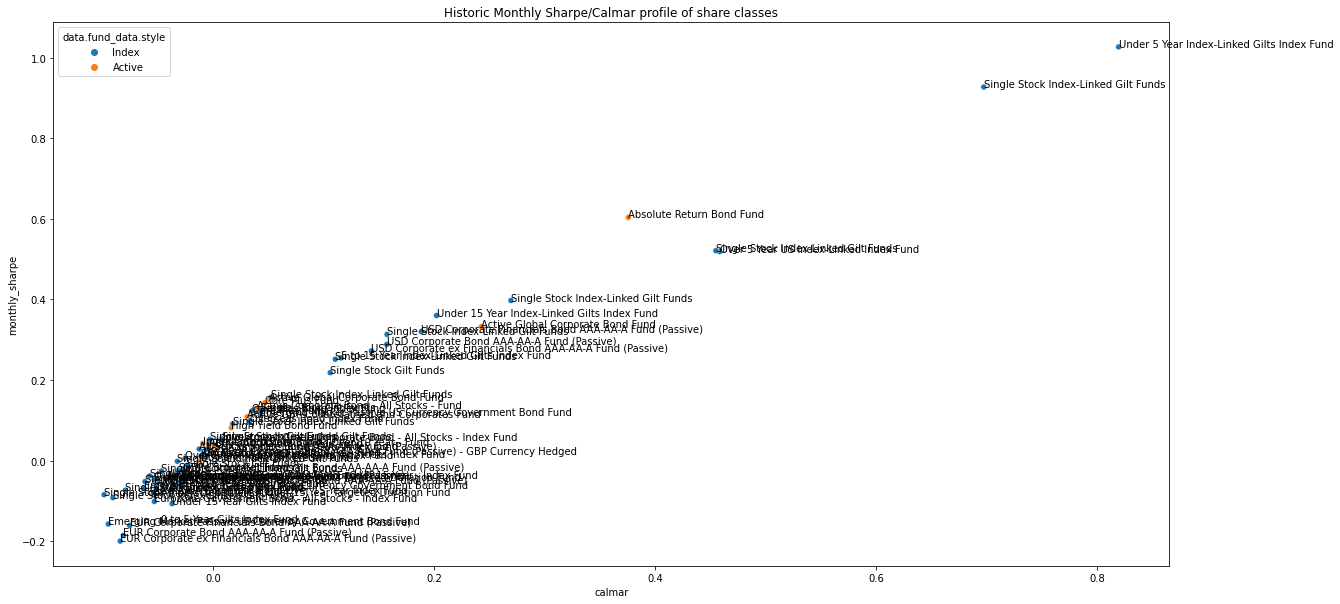

In [119]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="calmar", y="monthly_sharpe", data=sc_stats, hue='data.fund_data.style'). \
      set(title='Historic Monthly Sharpe/Calmar profile of share classes')

# Loop through the data points 
for i, id_v in enumerate(sc_stats['data.fund_data.name']):
    plt.text(sc_stats['calmar'][i], sc_stats['monthly_sharpe'][i], id_v)

In [120]:
relevant_columns = ['monthly_sharpe', 'data.fund_data.name', 'data.fund_data.style', 'id', 'data.scopeCode',  'monthly_mean', 'monthly_vol', 'cagr', 'max_drawdown', 'calmar']
sc_stats.sort_values('monthly_sharpe', ascending=False).head(10)[relevant_columns]

,monthly_sharpe,data.fund_data.name,data.fund_data.style,id,data.scopeCode,monthly_mean,monthly_vol,cagr,max_drawdown,calmar
43,1.026981,Under 5 Year Index-Linked Gilts Index Fund,Index,3078,LUAC,0.01954,0.019027,0.019538,-0.023837,0.819641
59,0.927427,Single Stock Index-Linked Gilt Funds,Index,3258,LSAF,0.02584,0.027862,0.025762,-0.036931,0.697569
7,0.603658,Absolute Return Bond Fund,Active,2819,YAAF,0.0168,0.02783,0.016542,-0.044007,0.375892
60,0.521082,Single Stock Index-Linked Gilt Funds,Index,3259,TJ,0.02436,0.046749,0.023541,-0.051719,0.455169
37,0.518495,Over 5 Year US Index-Linked Index Fund,Index,3035,CG,0.0482,0.092961,0.044863,-0.097847,0.458503
61,0.397357,Single Stock Index-Linked Gilt Funds,Index,3260,TH,0.02218,0.055819,0.020852,-0.07733,0.269644
42,0.359952,Under 15 Year Index-Linked Gilts Index Fund,Index,3076,NG,0.0153,0.042506,0.014511,-0.071717,0.202335
11,0.332493,Active Global Corporate Bond Fund,Active,2831,CSAF,0.02486,0.074768,0.022346,-0.091988,0.242917
47,0.320236,USD Corporate Financials Bond AAA-AA-A Fund (P...,Index,3087,TY,0.03052,0.095305,0.026383,-0.13994,0.18853
62,0.31317,Single Stock Index-Linked Gilt Funds,Index,3261,VJ,0.02136,0.068206,0.019248,-0.122196,0.157517


#### Areas for further improvement / research:


*   Aggregate holdings from each fund to view total company holdings & concentration risk by issuer and bond features?
*   Aggregate ESG risk factors from each fund at the company level to identify concentration risk and opportunities for greater influence / short term action requirements?
*   Interesting project: model future purchase and sell of holdings of funds to encourage internal transactions, instead of market to reduce costs and return enhancement opportunities?
*   Dynamic visualisation of 2 metrics against one another with 3rd factor of grouping (for example: risk vs return for fund type)
*   Historic evolution of visualised metrics over time
*   Further analysis of underlying portfolios for similarities and difference between funds and their decisions?